In [1]:
from processed_image import ProcessedImage, read_from_dir, show_image_strip
imgs = list(read_from_dir('..\\Data\\LittleCarDb1'))
[str(img) for img in imgs[0:5]]

['ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-001_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-002_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-005_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-007_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-008_1.jpg (0 in cache)']

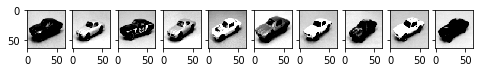

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
_, axes = plt.subplots(1, 10, sharey=True, figsize=(8,1.5))
show_image_strip(imgs, axes)

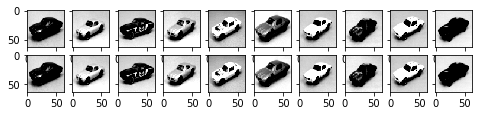

In [3]:
_, axes = plt.subplots(2, 10, sharey=True, figsize=(8,1.5))
processed_dict = {img.fullpath:img.get_processed_image() for img in imgs}
show_image_strip(imgs, axes, predicted_dict=processed_dict)

In [4]:
import numpy as np
import random
random.shuffle(imgs)
x_train = [img.get_processed_image(size=128) for img in imgs]
x_train = np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))

test_size = int(len(x_train)/10)
x_test = x_train[0:test_size]
x_train = x_train[test_size+1:]
x_train.shape, x_test.shape

((153, 128, 128, 1), (17, 128, 128, 1))

In [5]:
from model_vae_3stage import ModelVae3Stage
all_model = ModelVae3Stage(size=128, in_channels=1, latent_dim=8)
vae, enc, dec = all_model.vae, all_model.encoder, all_model.decoder

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [13]:
vae.fit(x_train, x_train, epochs=1000, batch_size=512, 
        shuffle=True, validation_data=(x_test,x_test))

Train on 153 samples, validate on 17 samples
Epoch 1/1000
153/153 [==============================] - 0s 1ms/step - loss: 6489.6328 - val_loss: 7928.3252
Epoch 2/1000
153/153 [==============================] - 0s 1ms/step - loss: 6486.9321 - val_loss: 7980.2969
Epoch 3/1000
153/153 [==============================] - 0s 1ms/step - loss: 6479.8369 - val_loss: 7938.7407
Epoch 4/1000
153/153 [==============================] - 0s 1ms/step - loss: 6484.2686 - val_loss: 8011.4180
Epoch 5/1000
153/153 [==============================] - 0s 1ms/step - loss: 6482.6436 - val_loss: 7910.5166
Epoch 6/1000
153/153 [==============================] - 0s 1ms/step - loss: 6504.5220 - val_loss: 8027.8188
Epoch 7/1000
153/153 [==============================] - 0s 1ms/step - loss: 6512.8911 - val_loss: 7907.1230
Epoch 8/1000
153/153 [==============================] - 0s 1ms/step - loss: 6558.4126 - val_loss: 8063.1470
Epoch 9/1000
153/153 [==============================] - 0s 1ms/step - loss: 6554.5215 - val

Epoch 76/1000
153/153 [==============================] - 0s 1ms/step - loss: 6565.3755 - val_loss: 8049.1055
Epoch 77/1000
153/153 [==============================] - 0s 1ms/step - loss: 6553.2568 - val_loss: 7961.4946
Epoch 78/1000
153/153 [==============================] - 0s 1ms/step - loss: 6595.0239 - val_loss: 8002.4072
Epoch 79/1000
153/153 [==============================] - 0s 1ms/step - loss: 6571.3247 - val_loss: 7955.2271
Epoch 80/1000
153/153 [==============================] - 0s 1ms/step - loss: 6585.5010 - val_loss: 7955.7207
Epoch 81/1000
153/153 [==============================] - 0s 1ms/step - loss: 6558.4082 - val_loss: 8007.4780
Epoch 82/1000
153/153 [==============================] - 0s 1ms/step - loss: 6549.3208 - val_loss: 7940.8574
Epoch 83/1000
153/153 [==============================] - 0s 1ms/step - loss: 6559.0513 - val_loss: 8041.3408
Epoch 84/1000
153/153 [==============================] - 0s 1ms/step - loss: 6552.4966 - val_loss: 7918.9019
Epoch 85/1000
153/1

Epoch 151/1000
153/153 [==============================] - 0s 1ms/step - loss: 6537.6982 - val_loss: 7935.5093
Epoch 152/1000
153/153 [==============================] - 0s 1ms/step - loss: 6521.8359 - val_loss: 8035.7510
Epoch 153/1000
153/153 [==============================] - 0s 1ms/step - loss: 6522.3955 - val_loss: 7950.9238
Epoch 154/1000
153/153 [==============================] - 0s 1ms/step - loss: 6506.2104 - val_loss: 8006.2539
Epoch 155/1000
153/153 [==============================] - 0s 1ms/step - loss: 6511.8164 - val_loss: 7981.9355
Epoch 156/1000
153/153 [==============================] - 0s 1ms/step - loss: 6496.1567 - val_loss: 7971.4136
Epoch 157/1000
153/153 [==============================] - 0s 1ms/step - loss: 6509.2075 - val_loss: 7989.7646
Epoch 158/1000
153/153 [==============================] - 0s 1ms/step - loss: 6492.0332 - val_loss: 7962.2383
Epoch 159/1000
153/153 [==============================] - 0s 1ms/step - loss: 6507.3130 - val_loss: 8028.0376
Epoch 160/

Epoch 226/1000
153/153 [==============================] - 0s 1ms/step - loss: 6512.9692 - val_loss: 8008.0825
Epoch 227/1000
153/153 [==============================] - 0s 1ms/step - loss: 6505.6260 - val_loss: 8008.0469
Epoch 228/1000
153/153 [==============================] - 0s 1ms/step - loss: 6514.1792 - val_loss: 7980.3638
Epoch 229/1000
153/153 [==============================] - 0s 1ms/step - loss: 6511.0801 - val_loss: 7990.5352
Epoch 230/1000
153/153 [==============================] - 0s 1ms/step - loss: 6522.2598 - val_loss: 7998.3770
Epoch 231/1000
153/153 [==============================] - 0s 1ms/step - loss: 6511.9185 - val_loss: 7966.9624
Epoch 232/1000
153/153 [==============================] - 0s 1ms/step - loss: 6526.8511 - val_loss: 7985.7666
Epoch 233/1000
153/153 [==============================] - 0s 1ms/step - loss: 6516.0830 - val_loss: 7998.8564
Epoch 234/1000
153/153 [==============================] - 0s 1ms/step - loss: 6527.4277 - val_loss: 7993.7627
Epoch 235/

Epoch 301/1000
153/153 [==============================] - 0s 1ms/step - loss: 6484.4351 - val_loss: 8098.1987
Epoch 302/1000
153/153 [==============================] - 0s 1ms/step - loss: 6474.8145 - val_loss: 7872.5938
Epoch 303/1000
153/153 [==============================] - 0s 1ms/step - loss: 6501.0312 - val_loss: 8140.6592
Epoch 304/1000
153/153 [==============================] - 0s 1ms/step - loss: 6487.3564 - val_loss: 7848.1904
Epoch 305/1000
153/153 [==============================] - 0s 1ms/step - loss: 6519.2476 - val_loss: 8123.7915
Epoch 306/1000
153/153 [==============================] - 0s 1ms/step - loss: 6498.1914 - val_loss: 7851.9844
Epoch 307/1000
153/153 [==============================] - 0s 1ms/step - loss: 6533.5610 - val_loss: 8117.0239
Epoch 308/1000
153/153 [==============================] - 0s 1ms/step - loss: 6500.5161 - val_loss: 7868.6709
Epoch 309/1000
153/153 [==============================] - 0s 1ms/step - loss: 6536.1753 - val_loss: 8150.2905
Epoch 310/

Epoch 376/1000
153/153 [==============================] - 0s 1ms/step - loss: 6522.2861 - val_loss: 8032.0918
Epoch 377/1000
153/153 [==============================] - 0s 1ms/step - loss: 6507.1338 - val_loss: 7963.2759
Epoch 378/1000
153/153 [==============================] - 0s 1ms/step - loss: 6519.4517 - val_loss: 7982.7427
Epoch 379/1000
153/153 [==============================] - 0s 1ms/step - loss: 6500.3340 - val_loss: 7996.0679
Epoch 380/1000
153/153 [==============================] - 0s 1ms/step - loss: 6506.5918 - val_loss: 7995.3843
Epoch 381/1000
153/153 [==============================] - 0s 1ms/step - loss: 6494.5249 - val_loss: 8004.0283
Epoch 382/1000
153/153 [==============================] - 0s 1ms/step - loss: 6498.6543 - val_loss: 7997.8262
Epoch 383/1000
153/153 [==============================] - 0s 1ms/step - loss: 6495.3604 - val_loss: 8016.9688
Epoch 384/1000
153/153 [==============================] - 0s 1ms/step - loss: 6504.7134 - val_loss: 7993.8096
Epoch 385/

Epoch 451/1000
153/153 [==============================] - 0s 1ms/step - loss: 6601.3037 - val_loss: 8055.5283
Epoch 452/1000
153/153 [==============================] - 0s 1ms/step - loss: 6602.2686 - val_loss: 7975.6406
Epoch 453/1000
153/153 [==============================] - 0s 1ms/step - loss: 6577.9014 - val_loss: 8042.1738
Epoch 454/1000
153/153 [==============================] - 0s 1ms/step - loss: 6545.5435 - val_loss: 7980.5439
Epoch 455/1000
153/153 [==============================] - 0s 1ms/step - loss: 6527.4478 - val_loss: 8013.7886
Epoch 456/1000
153/153 [==============================] - 0s 1ms/step - loss: 6519.1294 - val_loss: 8037.0894
Epoch 457/1000
153/153 [==============================] - 0s 1ms/step - loss: 6523.7764 - val_loss: 7962.2554
Epoch 458/1000
153/153 [==============================] - 0s 1ms/step - loss: 6538.0205 - val_loss: 8070.4053
Epoch 459/1000
153/153 [==============================] - 0s 1ms/step - loss: 6539.4624 - val_loss: 7944.6792
Epoch 460/

Epoch 526/1000
153/153 [==============================] - 0s 1ms/step - loss: 6479.1396 - val_loss: 7913.4321
Epoch 527/1000
153/153 [==============================] - 0s 1ms/step - loss: 6490.5820 - val_loss: 8066.1914
Epoch 528/1000
153/153 [==============================] - 0s 1ms/step - loss: 6477.2612 - val_loss: 7906.4438
Epoch 529/1000
153/153 [==============================] - 0s 1ms/step - loss: 6493.1938 - val_loss: 8056.0376
Epoch 530/1000
153/153 [==============================] - 0s 1ms/step - loss: 6480.5508 - val_loss: 7934.4888
Epoch 531/1000
153/153 [==============================] - 0s 1ms/step - loss: 6495.2202 - val_loss: 8026.9033
Epoch 532/1000
153/153 [==============================] - 0s 1ms/step - loss: 6479.8140 - val_loss: 7936.1147
Epoch 533/1000
153/153 [==============================] - 0s 1ms/step - loss: 6481.1475 - val_loss: 8005.5791
Epoch 534/1000
153/153 [==============================] - 0s 1ms/step - loss: 6467.9336 - val_loss: 7957.1895
Epoch 535/

Epoch 601/1000
153/153 [==============================] - 0s 1ms/step - loss: 6656.8887 - val_loss: 8063.7739
Epoch 602/1000
153/153 [==============================] - 0s 1ms/step - loss: 6586.4487 - val_loss: 8007.5894
Epoch 603/1000
153/153 [==============================] - 0s 1ms/step - loss: 6550.4238 - val_loss: 7980.1606
Epoch 604/1000
153/153 [==============================] - 0s 1ms/step - loss: 6524.9102 - val_loss: 8076.3999
Epoch 605/1000
153/153 [==============================] - 0s 1ms/step - loss: 6509.4487 - val_loss: 7930.6855
Epoch 606/1000
153/153 [==============================] - 0s 1ms/step - loss: 6521.2437 - val_loss: 8096.3105
Epoch 607/1000
153/153 [==============================] - 0s 1ms/step - loss: 6517.4814 - val_loss: 7905.2988
Epoch 608/1000
153/153 [==============================] - 0s 1ms/step - loss: 6541.2363 - val_loss: 8166.9561
Epoch 609/1000
153/153 [==============================] - 0s 1ms/step - loss: 6523.7485 - val_loss: 7907.5811
Epoch 610/

Epoch 676/1000
153/153 [==============================] - 0s 1ms/step - loss: 6500.2837 - val_loss: 7996.1084
Epoch 677/1000
153/153 [==============================] - 0s 1ms/step - loss: 6500.3477 - val_loss: 8021.1904
Epoch 678/1000
153/153 [==============================] - 0s 1ms/step - loss: 6486.0195 - val_loss: 7967.4834
Epoch 679/1000
153/153 [==============================] - 0s 1ms/step - loss: 6491.2744 - val_loss: 8036.1831
Epoch 680/1000
153/153 [==============================] - 0s 1ms/step - loss: 6479.5664 - val_loss: 7964.7544
Epoch 681/1000
153/153 [==============================] - 0s 1ms/step - loss: 6481.0342 - val_loss: 8041.7241
Epoch 682/1000
153/153 [==============================] - 0s 1ms/step - loss: 6476.2593 - val_loss: 7937.2178
Epoch 683/1000
153/153 [==============================] - 0s 1ms/step - loss: 6478.0464 - val_loss: 8060.1406
Epoch 684/1000
153/153 [==============================] - 0s 1ms/step - loss: 6479.0039 - val_loss: 7959.2739
Epoch 685/

Epoch 751/1000
153/153 [==============================] - 0s 1ms/step - loss: 6480.8525 - val_loss: 7999.6602
Epoch 752/1000
153/153 [==============================] - 0s 1ms/step - loss: 6471.5122 - val_loss: 8064.3169
Epoch 753/1000
153/153 [==============================] - 0s 1ms/step - loss: 6474.5015 - val_loss: 8009.4805
Epoch 754/1000
153/153 [==============================] - 0s 1ms/step - loss: 6467.1284 - val_loss: 8034.5571
Epoch 755/1000
153/153 [==============================] - 0s 1ms/step - loss: 6474.3564 - val_loss: 7993.6792
Epoch 756/1000
153/153 [==============================] - 0s 1ms/step - loss: 6469.8623 - val_loss: 8051.2627
Epoch 757/1000
153/153 [==============================] - 0s 1ms/step - loss: 6479.8789 - val_loss: 7990.1323
Epoch 758/1000
153/153 [==============================] - 0s 1ms/step - loss: 6471.4346 - val_loss: 8010.4624
Epoch 759/1000
153/153 [==============================] - 0s 1ms/step - loss: 6479.4976 - val_loss: 7989.1050
Epoch 760/

Epoch 826/1000
153/153 [==============================] - 0s 1ms/step - loss: 6488.7461 - val_loss: 8054.4980
Epoch 827/1000
153/153 [==============================] - 0s 1ms/step - loss: 6473.4116 - val_loss: 7935.6855
Epoch 828/1000
153/153 [==============================] - 0s 1ms/step - loss: 6507.3315 - val_loss: 8033.9102
Epoch 829/1000
153/153 [==============================] - 0s 1ms/step - loss: 6489.2402 - val_loss: 7966.6138
Epoch 830/1000
153/153 [==============================] - 0s 1ms/step - loss: 6514.4844 - val_loss: 8029.7095
Epoch 831/1000
153/153 [==============================] - 0s 1ms/step - loss: 6495.8613 - val_loss: 7997.8071
Epoch 832/1000
153/153 [==============================] - 0s 1ms/step - loss: 6507.7715 - val_loss: 8011.0332
Epoch 833/1000
153/153 [==============================] - 0s 1ms/step - loss: 6505.0547 - val_loss: 8017.3354
Epoch 834/1000
153/153 [==============================] - 0s 1ms/step - loss: 6502.9839 - val_loss: 7984.3584
Epoch 835/

Epoch 901/1000
153/153 [==============================] - 0s 1ms/step - loss: 6479.7676 - val_loss: 8024.7930
Epoch 902/1000
153/153 [==============================] - 0s 1ms/step - loss: 6475.6489 - val_loss: 8046.3823
Epoch 903/1000
153/153 [==============================] - 0s 1ms/step - loss: 6478.0752 - val_loss: 8006.5039
Epoch 904/1000
153/153 [==============================] - 0s 1ms/step - loss: 6478.1587 - val_loss: 8093.7612
Epoch 905/1000
153/153 [==============================] - 0s 1ms/step - loss: 6484.8784 - val_loss: 7986.2905
Epoch 906/1000
153/153 [==============================] - 0s 1ms/step - loss: 6488.3013 - val_loss: 8088.6450
Epoch 907/1000
153/153 [==============================] - 0s 1ms/step - loss: 6489.4390 - val_loss: 7973.5000
Epoch 908/1000
153/153 [==============================] - 0s 1ms/step - loss: 6493.0938 - val_loss: 8074.8481
Epoch 909/1000
153/153 [==============================] - 0s 1ms/step - loss: 6489.5435 - val_loss: 7971.9751
Epoch 910/

Epoch 976/1000
153/153 [==============================] - 0s 1ms/step - loss: 6478.2437 - val_loss: 8102.4487
Epoch 977/1000
153/153 [==============================] - 0s 1ms/step - loss: 6458.4805 - val_loss: 7918.2280
Epoch 978/1000
153/153 [==============================] - 0s 1ms/step - loss: 6488.5845 - val_loss: 8165.7793
Epoch 979/1000
153/153 [==============================] - 0s 1ms/step - loss: 6467.9189 - val_loss: 7880.2002
Epoch 980/1000
153/153 [==============================] - 0s 1ms/step - loss: 6509.2305 - val_loss: 8184.1553
Epoch 981/1000
153/153 [==============================] - 0s 1ms/step - loss: 6469.9336 - val_loss: 7881.5054
Epoch 982/1000
153/153 [==============================] - 0s 1ms/step - loss: 6499.9985 - val_loss: 8139.9883
Epoch 983/1000
153/153 [==============================] - 0s 1ms/step - loss: 6461.0850 - val_loss: 7913.3198
Epoch 984/1000
153/153 [==============================] - 0s 1ms/step - loss: 6483.1714 - val_loss: 8128.1230
Epoch 985/

In [7]:
def show_original_decoded(original, decoded, sz):
    n = 10  # how many digits we will display
    plt.figure(figsize=(n*2, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(original[i].reshape(128, 128), cmap='gray')
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded[i].reshape(128, 128), cmap='gray')
    plt.show()

(17, 128, 128, 1) -> (17, 8) -> (17, 128, 128, 1)


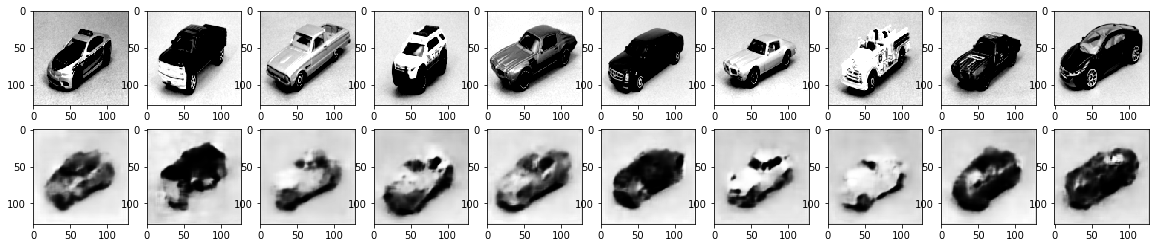

In [14]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=400, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=40, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=100, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=40, batch_size=1024,
        shuffle=True, validation_data=(x_test,x_test))

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=100, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=100, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))
vae.save('model_vae_3stage.h5')

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=1000, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))
vae.save('model_vae_3stage.h5')

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
with open("model_vae_3stage.yaml", "w") as yaml_model_file:
    yaml_model_file.write(vae.to_yaml())